# IOT device identification classification

## Standard Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the Datasets

In [3]:

df_train = pd.read_csv('iot_device_train.csv')
df_test = pd.read_csv('iot_device_test.csv')
df_train.head()

,ack,ack_A,ack_B,bytes,bytes_A,bytes_A_B_ratio,bytes_B,ds_field_A,ds_field_B,duration,...,suffix_is_co.il,suffix_is_com,suffix_is_com.sg,suffix_is_else,suffix_is_empty_char_value,suffix_is_googleapis.com,suffix_is_net,suffix_is_org,suffix_is_unresolved,device_category
0,9,5,5,1213,743,0.713924,668,0,0,1.5756,...,0,0,0,1,0,0,0,0,0,security_camera
1,9,5,5,1213,743,1.806874,668,0,0,0.6890,...,0,0,0,1,0,0,0,0,0,security_camera
2,9,5,5,1213,743,0.103124,668,0,0,0.9852,...,0,0,0,1,0,0,0,0,0,security_camera
3,9,5,5,1213,743,1.806874,668,0,0,1.5756,...,0,0,0,1,0,0,0,0,0,security_camera
4,9,5,5,1213,743,1.806874,668,0,0,1.5756,...,0,0,0,1,0,0,0,0,0,security_camera


In [4]:
df_test.head()

,ack,ack_A,ack_B,bytes,bytes_A,bytes_A_B_ratio,bytes_B,ds_field_A,ds_field_B,duration,...,suffix_is_co.il,suffix_is_com,suffix_is_com.sg,suffix_is_else,suffix_is_empty_char_value,suffix_is_googleapis.com,suffix_is_net,suffix_is_org,suffix_is_unresolved,device_category
0,38,20,18,14698,7814,1.135096,6884,0,0,1.9156,...,0,0,0,1,0,0,0,0,0,baby_monitor
1,38,20,18,14698,7814,1.135096,6884,0,0,2.0020,...,0,0,0,1,0,0,0,0,0,baby_monitor
2,38,20,18,14762,7814,1.124640,6948,0,0,2.1833,...,0,0,0,1,0,0,0,0,0,baby_monitor
3,38,20,18,14762,7814,1.124640,6948,0,0,2.1521,...,0,0,0,1,0,0,0,0,0,baby_monitor
4,41,20,21,14862,7994,1.163949,6868,0,0,2.2422,...,0,0,0,1,0,0,0,0,0,baby_monitor


## Data Exporation

In [5]:
df_train

,ack,ack_A,ack_B,bytes,bytes_A,bytes_A_B_ratio,bytes_B,ds_field_A,ds_field_B,duration,...,suffix_is_co.il,suffix_is_com,suffix_is_com.sg,suffix_is_else,suffix_is_empty_char_value,suffix_is_googleapis.com,suffix_is_net,suffix_is_org,suffix_is_unresolved,device_category
0,9,5,5,1213,743,0.713924,668,0,0,1.5756,...,0,0,0,1,0,0,0,0,0,security_camera
1,9,5,5,1213,743,1.806874,668,0,0,0.6890,...,0,0,0,1,0,0,0,0,0,security_camera
2,9,5,5,1213,743,0.103124,668,0,0,0.9852,...,0,0,0,1,0,0,0,0,0,security_camera
3,9,5,5,1213,743,1.806874,668,0,0,1.5756,...,0,0,0,1,0,0,0,0,0,security_camera
4,9,5,5,1213,743,1.806874,668,0,0,1.5756,...,0,0,0,1,0,0,0,0,0,security_camera
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,240,0,0.000000,240,0,64,1.4983,...,0,0,0,1,0,0,0,0,0,socket
996,0,0,0,240,0,0.000000,240,0,64,1.4979,...,0,0,0,1,0,0,0,0,0,socket
997,0,0,0,240,0,0.000000,240,0,64,1.4950,...,0,0,0,1,0,0,0,0,0,socket
998,0,0,0,240,0,0.000000,240,0,64,1.4993,...,0,0,0,1,0,0,0,0,0,socket


In [6]:
df_test

,ack,ack_A,ack_B,bytes,bytes_A,bytes_A_B_ratio,bytes_B,ds_field_A,ds_field_B,duration,...,suffix_is_co.il,suffix_is_com,suffix_is_com.sg,suffix_is_else,suffix_is_empty_char_value,suffix_is_googleapis.com,suffix_is_net,suffix_is_org,suffix_is_unresolved,device_category
0,38,20,18,14698,7814,1.135096,6884,0,0,1.9156,...,0,0,0,1,0,0,0,0,0,baby_monitor
1,38,20,18,14698,7814,1.135096,6884,0,0,2.0020,...,0,0,0,1,0,0,0,0,0,baby_monitor
2,38,20,18,14762,7814,1.124640,6948,0,0,2.1833,...,0,0,0,1,0,0,0,0,0,baby_monitor
3,38,20,18,14762,7814,1.124640,6948,0,0,2.1521,...,0,0,0,1,0,0,0,0,0,baby_monitor
4,41,20,21,14862,7994,1.163949,6868,0,0,2.2422,...,0,0,0,1,0,0,0,0,0,baby_monitor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,264,116,148,212053,202036,20.169310,10017,0,0,250.1856,...,0,0,0,0,1,0,0,0,0,watch
896,24,13,11,7749,5364,2.249056,2385,0,0,300.6818,...,0,0,0,1,0,0,0,0,0,watch
897,20,9,11,7091,5336,3.040454,1755,0,0,300.9433,...,0,0,0,1,0,0,0,0,0,watch
898,30,14,16,7882,5789,2.765885,2093,0,0,244.8219,...,0,0,0,0,1,0,0,0,0,watch


<AxesSubplot:title={'center':'Training set device categroy'}, xlabel='device_category', ylabel='count'>

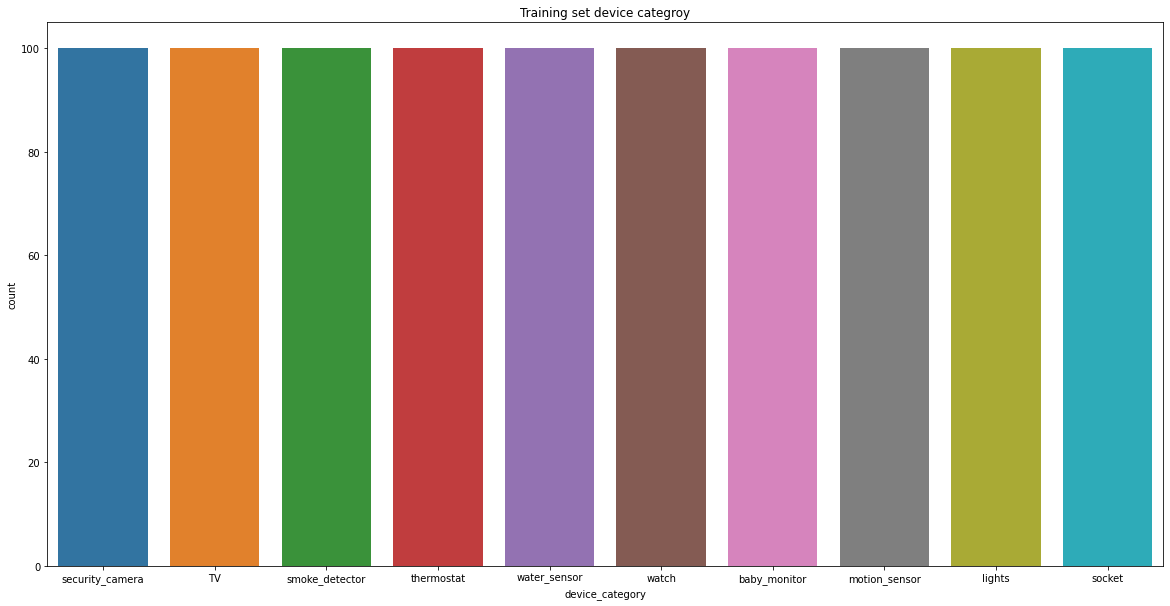

In [7]:
plt.figure(figsize=(20,10))
plt.title("Training set device categroy")
sns.countplot(data=df_train, x='device_category')

<AxesSubplot:title={'center':'Test set device categroy'}, xlabel='device_category', ylabel='count'>

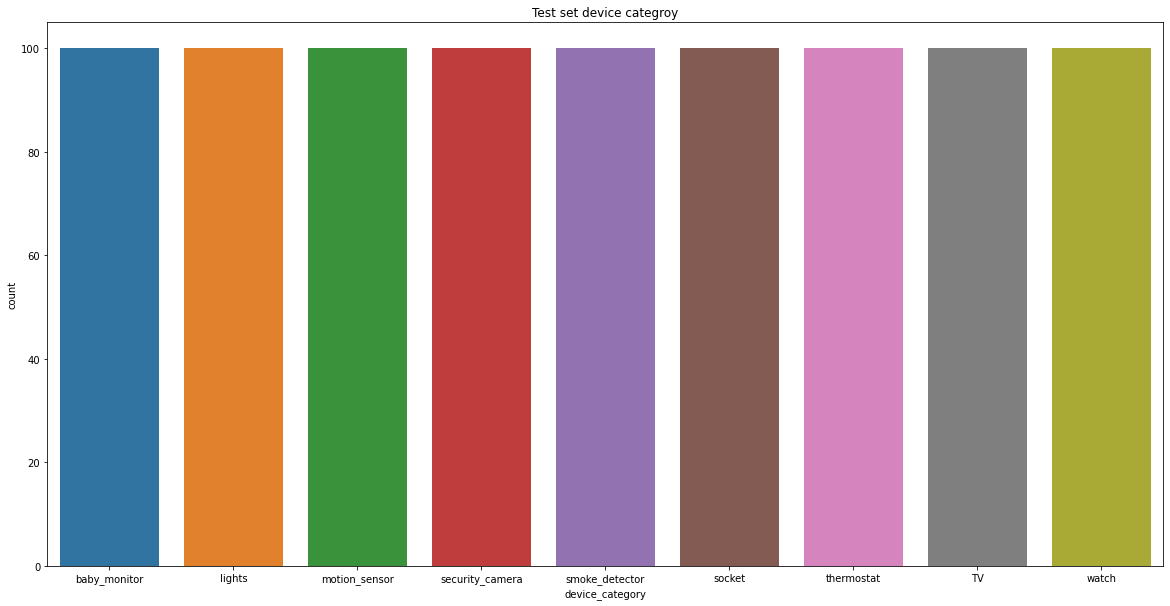

In [8]:
plt.figure(figsize=(20,10))
plt.title("Test set device categroy")
sns.countplot(data=df_test, x='device_category')

the test set data did not contain any water sensor for the labels. 
i will consiser to join the 2 dataset and do a train test split

In [9]:
df = pd.concat([df_train,df_test],ignore_index=True)

In [10]:
df

,ack,ack_A,ack_B,bytes,bytes_A,bytes_A_B_ratio,bytes_B,ds_field_A,ds_field_B,duration,...,suffix_is_co.il,suffix_is_com,suffix_is_com.sg,suffix_is_else,suffix_is_empty_char_value,suffix_is_googleapis.com,suffix_is_net,suffix_is_org,suffix_is_unresolved,device_category
0,9,5,5,1213,743,0.713924,668,0,0,1.5756,...,0,0,0,1,0,0,0,0,0,security_camera
1,9,5,5,1213,743,1.806874,668,0,0,0.6890,...,0,0,0,1,0,0,0,0,0,security_camera
2,9,5,5,1213,743,0.103124,668,0,0,0.9852,...,0,0,0,1,0,0,0,0,0,security_camera
3,9,5,5,1213,743,1.806874,668,0,0,1.5756,...,0,0,0,1,0,0,0,0,0,security_camera
4,9,5,5,1213,743,1.806874,668,0,0,1.5756,...,0,0,0,1,0,0,0,0,0,security_camera
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,264,116,148,212053,202036,20.169310,10017,0,0,250.1856,...,0,0,0,0,1,0,0,0,0,watch
1896,24,13,11,7749,5364,2.249056,2385,0,0,300.6818,...,0,0,0,1,0,0,0,0,0,watch
1897,20,9,11,7091,5336,3.040454,1755,0,0,300.9433,...,0,0,0,1,0,0,0,0,0,watch
1898,30,14,16,7882,5789,2.765885,2093,0,0,244.8219,...,0,0,0,0,1,0,0,0,0,watch


<AxesSubplot:title={'center':'Count of device categroy'}, xlabel='device_category', ylabel='count'>

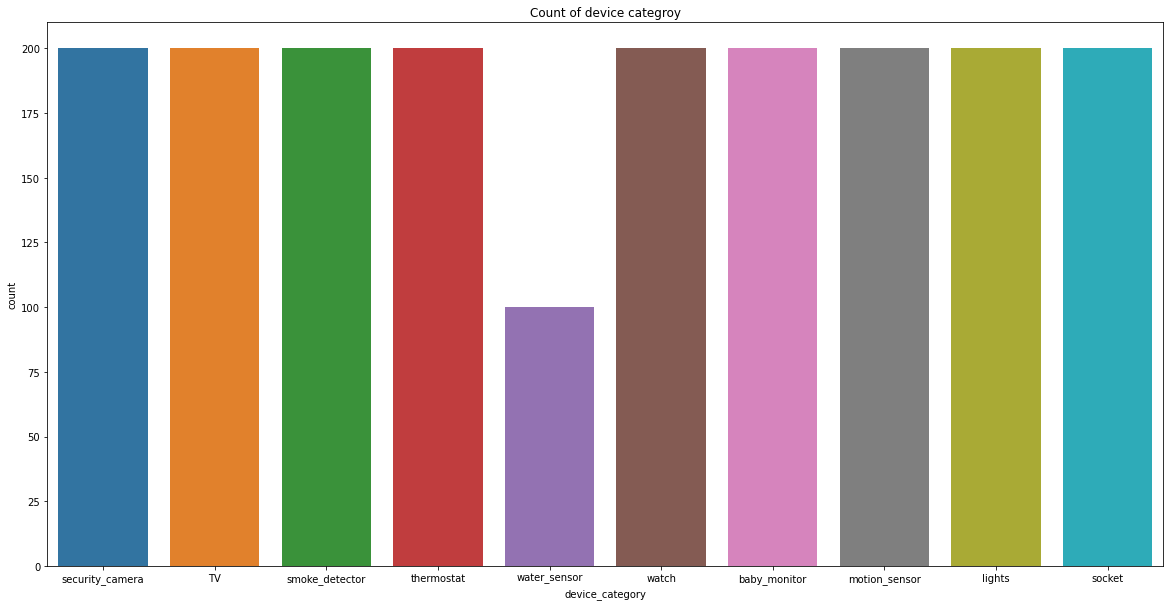

In [11]:
plt.figure(figsize=(20,10))
plt.title("Count of device categroy")
sns.countplot(data=df, x='device_category')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1900 entries, 0 to 1899
Columns: 298 entries, ack to device_category
dtypes: float64(123), int64(174), object(1)
memory usage: 4.3+ MB


In [13]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ack,1900.0,227.773158,4.461165e+03,0.0,0.0,9.0,15.0,184378.0
ack_A,1900.0,81.211579,1.125547e+03,0.0,0.0,5.0,7.0,39265.0
ack_B,1900.0,146.878947,3.415513e+03,0.0,0.0,5.0,8.0,145113.0
bytes,1900.0,149868.166842,4.937287e+06,60.0,240.0,1213.0,2411.0,213714584.0
bytes_A,1900.0,142106.884211,4.870776e+06,0.0,0.0,743.0,1160.0,210863813.0
...,...,...,...,...,...,...,...,...
suffix_is_empty_char_value,1900.0,0.318947,4.661913e-01,0.0,0.0,0.0,1.0,1.0
suffix_is_googleapis.com,1900.0,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0
suffix_is_net,1900.0,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0
suffix_is_org,1900.0,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0


we will remove those columns with one unique value

In [14]:
to_remove = []

for col in df.columns:
    if len(df[col].unique()) == 1:
        to_remove.append(col)


In [15]:
to_remove

['ds_field_A',
 'http_cookie_values_entropy',
 'http_cookie_values_stdev',
 'http_cookie_values_var',
 'http_req_bytes_entropy',
 'http_req_bytes_stdev',
 'http_req_bytes_var',
 'packet_size_B_min',
 'packet_size_min',
 'ssl_handshake_duration_entropy',
 'ssl_handshake_duration_stdev',
 'ssl_handshake_duration_var',
 'ttl_A_entropy',
 'ttl_A_stdev',
 'ttl_A_var',
 'is_g_http',
 'is_cdn_http',
 'is_img_http',
 'is_ad_http',
 'B_port_is_5222',
 'B_port_is_5223',
 'B_port_is_54975',
 'B_port_is_8280',
 'B_port_is_9543',
 'subdomain_is_99sets',
 'subdomain_is_ccc',
 'subdomain_is_feeds',
 'subdomain_is_h10141.www1',
 'subdomain_is_img',
 'subdomain_is_whp.aus1.cold.extweb',
 'subdomain_is_whp.hou9.cold.extweb',
 'domain_is_epicurious',
 'domain_is_hp',
 'domain_is_hpeprint',
 'domain_is_livecdn',
 'domain_is_mako',
 'domain_is_samsung',
 'suffix_is_biz',
 'suffix_is_cloudfront.net',
 'suffix_is_co.il',
 'suffix_is_com.sg',
 'suffix_is_googleapis.com',
 'suffix_is_net',
 'suffix_is_org']

In [16]:
df = df.drop(to_remove, axis=1)

In [17]:
df.describe()

,ack,ack_A,ack_B,bytes,bytes_A,bytes_A_B_ratio,bytes_B,ds_field_B,duration,http_GET,...,subdomain_is_www.cloud,domain_is_dlink,domain_is_else,domain_is_google,domain_is_proteussensor,domain_is_unresolved,suffix_is_com,suffix_is_else,suffix_is_empty_char_value,suffix_is_unresolved
count,1900.000000,1900.000000,1900.000000,1.900000e+03,1.900000e+03,1900.000000,1.900000e+03,1900.000000,1900.000000,1900.000000,...,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000
mean,227.773158,81.211579,146.878947,1.498682e+05,1.421069e+05,1.181570,7.824499e+03,16.951579,267.929434,0.086842,...,0.011053,0.003684,0.877895,0.002105,0.011053,0.044211,0.019474,0.555789,0.318947,0.044211
std,4461.164912,1125.546944,3415.513067,4.937287e+06,4.870776e+06,3.477177,7.768975e+04,28.199316,3157.437208,0.281678,...,0.104576,0.060602,0.327494,0.045847,0.104576,0.205617,0.138219,0.497009,0.466191,0.205617
min,0.000000,0.000000,0.000000,6.000000e+01,0.000000e+00,0.000000,6.000000e+01,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,2.400000e+02,0.000000e+00,0.000000,2.400000e+02,0.000000,1.487675,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,5.000000,5.000000,1.213000e+03,7.430000e+02,0.622177,6.680000e+02,0.000000,1.575600,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,15.000000,7.000000,8.000000,2.411000e+03,1.160000e+03,1.201825,1.096000e+03,64.000000,1.630525,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,184378.000000,39265.000000,145113.000000,2.137146e+08,2.108638e+08,73.967293,2.850771e+06,64.000000,58432.650400,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


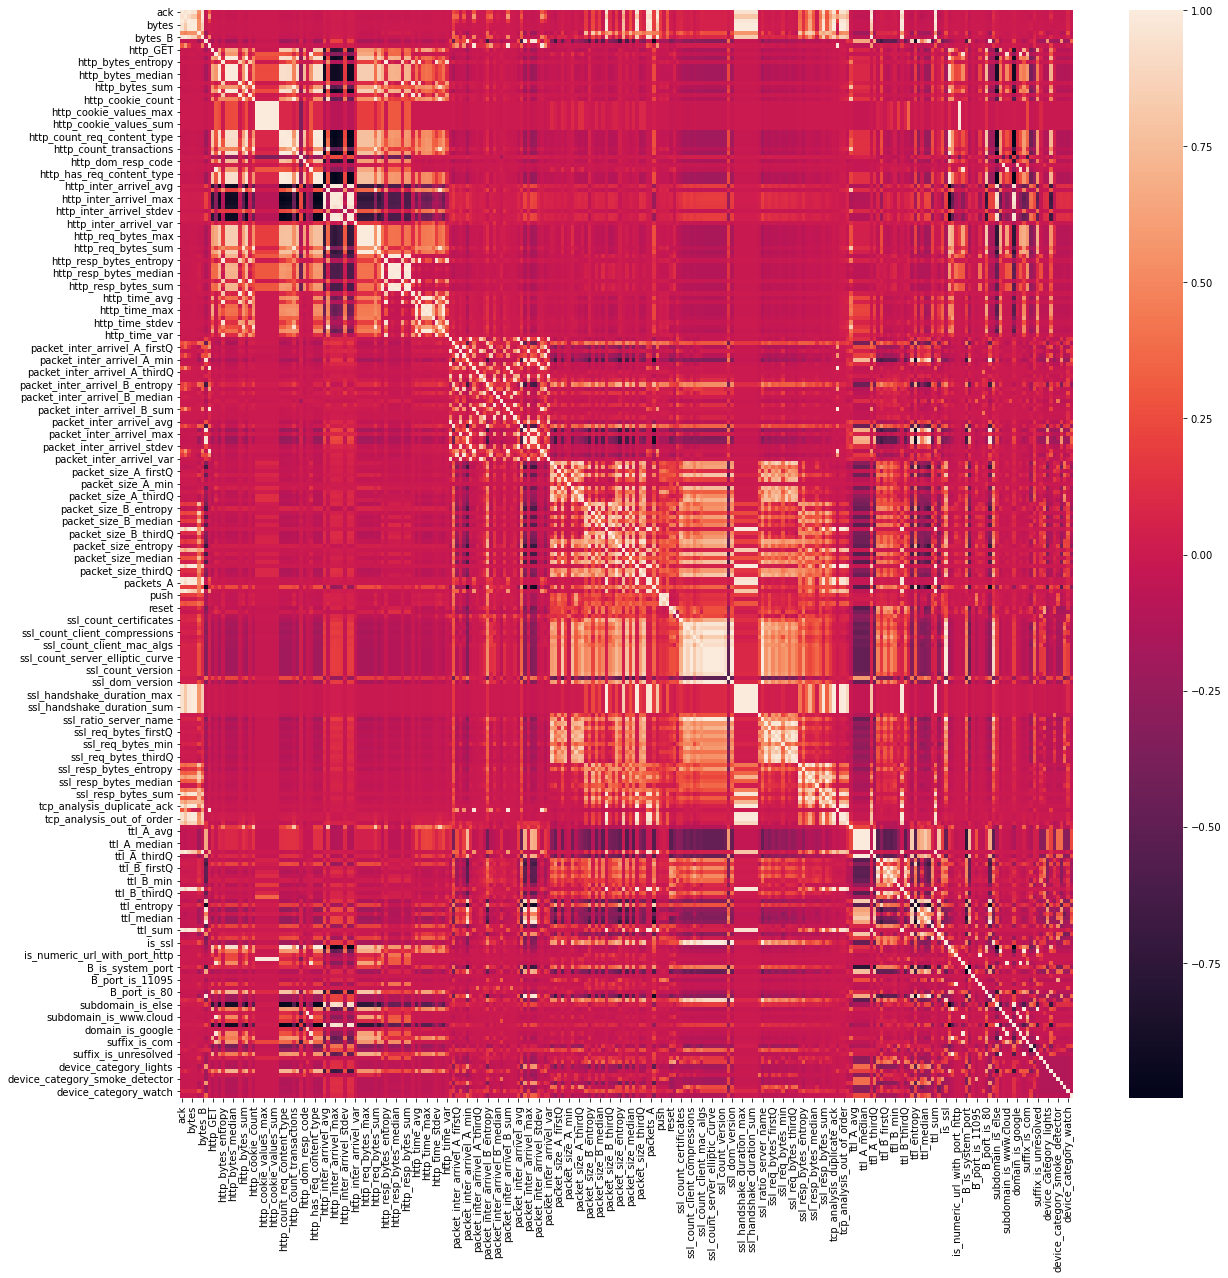

In [18]:
plt.figure(figsize=(20,20)),
sns.heatmap(data=pd.get_dummies(df).corr());

In [19]:
df.columns

Index(['ack', 'ack_A', 'ack_B', 'bytes', 'bytes_A', 'bytes_A_B_ratio',
       'bytes_B', 'ds_field_B', 'duration', 'http_GET',
       ...
       'domain_is_dlink', 'domain_is_else', 'domain_is_google',
       'domain_is_proteussensor', 'domain_is_unresolved', 'suffix_is_com',
       'suffix_is_else', 'suffix_is_empty_char_value', 'suffix_is_unresolved',
       'device_category'],
      dtype='object', length=254)

# 5. Modelling

In [20]:
X = df.drop('device_category', axis=1)
y = df['device_category']

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Imports

In [24]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

## Baseline Model Scores

In [25]:
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    
    model_scores = {}
    
    for name, model in models.items():
        model.fit(X_train,y_train)
        model_scores[name] = model.score(X_test,y_test)

    model_scores = pd.DataFrame(model_scores, index=['Score']).transpose()
    model_scores = model_scores.sort_values('Score')
        
    return model_scores

In [26]:
models = {'DecisionTreeClassifier': DecisionTreeClassifier(),
          'RandomForestClassifier': RandomForestClassifier(),
          'GradientBoostingClassifier': GradientBoostingClassifier()}

In [28]:
baseline_model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

In [29]:
baseline_model_scores

,Score
DecisionTreeClassifier,0.819298
RandomForestClassifier,0.856140
GradientBoostingClassifier,0.859649


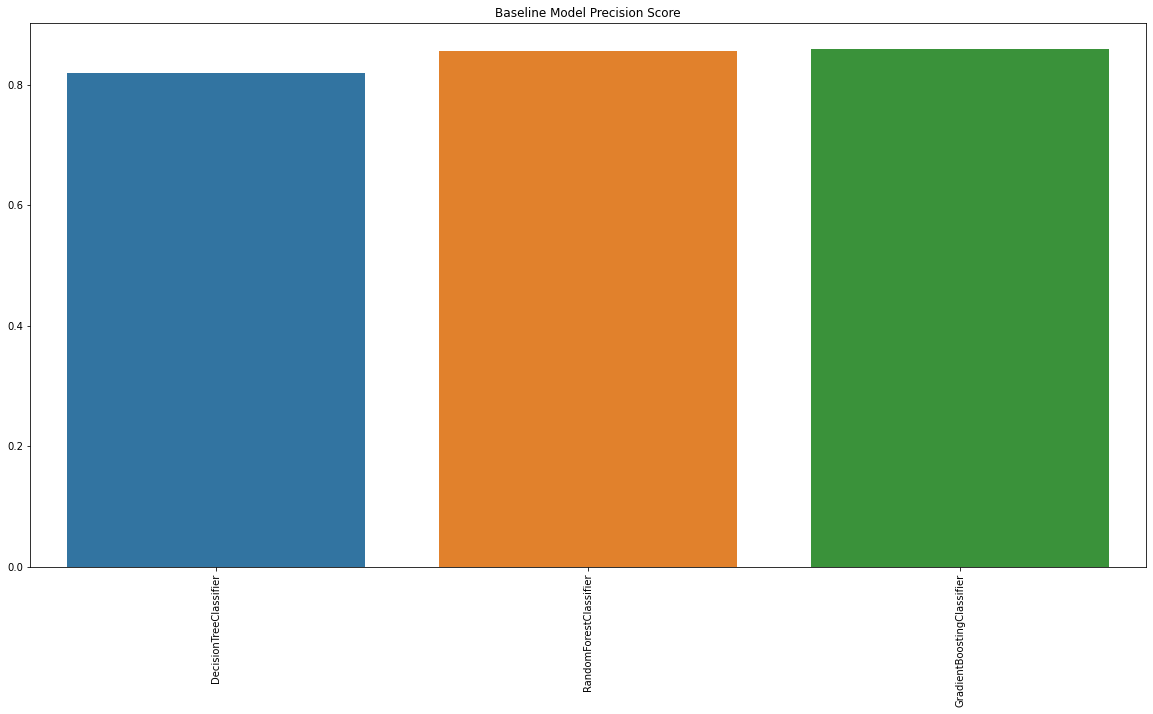

In [30]:
plt.figure(figsize=(20,10))
sns.barplot(data=baseline_model_scores.sort_values('Score').T)
plt.title('Baseline Model Precision Score')
plt.xticks(rotation=90);

From the baseline modelling we have a top 2 model scores of:
1. GradientBoostingClassifier 	0.859649
    
We can try tuning the hyperparams to check if the model improves

## Random Search CV

In [31]:
from sklearn.model_selection import RandomizedSearchCV
from warnings import filterwarnings

In [32]:
filterwarnings('ignore')

In [33]:
def randomsearch_cv_scores(models, params, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    
    model_rs_scores = {}
    model_rs_best_param = {}
    
    for name, model in models.items():
        rs_model = RandomizedSearchCV(model,
                                     param_distributions=params[name],
                                      cv=5,
                                     n_iter=20,n_jobs=1,
                                     verbose=0)        
        rs_model.fit(X_train,y_train)
        model_rs_scores[name] = rs_model.score(X_test,y_test)
        model_rs_best_param[name] = rs_model.best_params_
        
    return model_rs_scores, model_rs_best_param

In [35]:
GB = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=200, max_features='auto')
RF = RandomForestClassifier(n_estimators=10, criterion='entropy', max_features='auto', bootstrap=True)
DT =  DecisionTreeClassifier(random_state=42)

# Model 1 RandomForestClassifier

In [37]:
RF.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [40]:
rf_score = RF.score(X_test, y_test)

print('RandomForestClassifier processing ,,,')
print('RandomForestClassifier Score: %.3f %%' % rf_score)

RandomForestClassifier processing ,,,
RandomForestClassifier Score: 0.837 %


## Model 2 GradientBoostingClassifier

In [42]:
GB.fit(X_train, y_train)

GradientBoostingClassifier(max_features='auto', n_estimators=200)

In [44]:
gb_score = GB.score(X_test, y_test)

print('GradientBoostingClassifier processing ,,,')
print('GradientBoostingClassifier Score: %.3f %%' % gb_score)

GradientBoostingClassifier processing ,,,
GradientBoostingClassifier Score: 0.872 %


## Model 3 DecisionTreeClassifier

In [45]:
DT.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [47]:
dt_score = DT.score(X_test, y_test)

print('DecisionTreeClassifier processing ,,,')
print('DecisonTreeClassifier: %.3f %%' % dt_score)

DecisionTreeClassifier processing ,,,
DecisonTreeClassifier: 0.819 %


# 6. Model Evaluation

# Random Forest

In [48]:
from sklearn.metrics import classification_report, plot_confusion_matrix 
from sklearn.model_selection import cross_val_score

In [56]:
RF.fit(X_train,y_train)
y_preds = RF.predict(X_test)

In [57]:
print(classification_report(y_test,y_preds))

                 precision    recall  f1-score   support

             TV       0.79      0.93      0.85        57
   baby_monitor       1.00      0.96      0.98        48
         lights       0.50      0.65      0.56        48
  motion_sensor       0.95      0.94      0.95        67
security_camera       0.98      1.00      0.99        58
 smoke_detector       1.00      0.98      0.99        64
         socket       0.50      0.51      0.50        57
     thermostat       0.97      0.96      0.96        67
          watch       0.98      0.90      0.94        69
   water_sensor       0.50      0.29      0.36        35

       accuracy                           0.84       570
      macro avg       0.82      0.81      0.81       570
   weighted avg       0.84      0.84      0.84       570



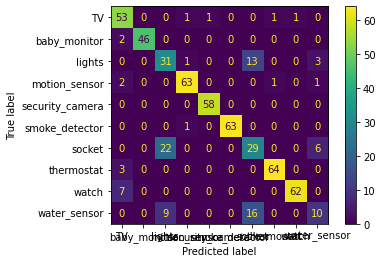

In [83]:
plot_confusion_matrix(RF,X_test,y_test)

## Evalution using cross-validation

In [84]:
def get_cv_score(RF, X, y, cv=5):
    
    np.random.seed(42)
    cv_accuracy = cross_val_score(RF,X,y,cv=5,
                         scoring='accuracy')
    print(f'Cross Validaion accuracy Scores: {cv_accuracy}')
    print(f'Cross Validation accuracy Mean Score: {cv_accuracy.mean()}')
      
    
    cv_merics = pd.DataFrame({'Accuracy': cv_accuracy.mean()}, index=[0])
    
    return cv_merics


In [85]:
cv_merics = get_cv_score(RF, X, y, cv=5)

Cross Validaion accuracy Scores: [0.75       0.82631579 0.86578947 0.86578947 0.87105263]
Cross Validation accuracy Mean Score: 0.8357894736842105


In [86]:
cv_merics

,Accuracy
0,0.835789


# Gradient Boosting

In [76]:
GB.fit(X_train,y_train)
y_preds = GB.predict(X_test)

In [79]:
print(classification_report(y_test,y_preds))

                 precision    recall  f1-score   support

             TV       0.87      0.95      0.91        57
   baby_monitor       1.00      0.98      0.99        48
         lights       0.51      0.56      0.53        48
  motion_sensor       0.96      0.99      0.97        67
security_camera       1.00      1.00      1.00        58
 smoke_detector       1.00      0.98      0.99        64
         socket       0.58      0.61      0.60        57
     thermostat       0.98      0.96      0.97        67
          watch       0.95      0.91      0.93        69
   water_sensor       0.67      0.51      0.58        35

       accuracy                           0.87       570
      macro avg       0.85      0.85      0.85       570
   weighted avg       0.87      0.87      0.87       570



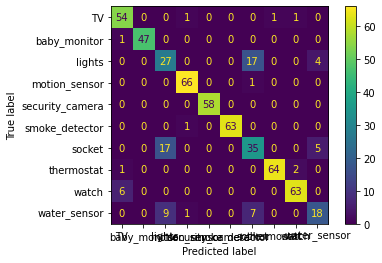

In [87]:
plot_confusion_matrix(GB,X_test,y_test)

In [88]:
def get_cv_score(GB, X, y, cv=5):
    
    np.random.seed(42)
    cv_accuracy = cross_val_score(GB,X,y,cv=5,
                         scoring='accuracy')
    print(f'Cross Validaion accuracy Scores: {cv_accuracy}')
    print(f'Cross Validation accuracy Mean Score: {cv_accuracy.mean()}')
      
    
    cv_merics = pd.DataFrame({'Accuracy': cv_accuracy.mean()}, index=[0])
    
    return cv_merics


In [89]:
cv_merics = get_cv_score(GB, X, y, cv=5)

Cross Validaion accuracy Scores: [0.72631579 0.84473684 0.88421053 0.88421053 0.87894737]
Cross Validation accuracy Mean Score: 0.8436842105263158


In [91]:
cv_merics

,Accuracy
0,0.843684


# Deciosn Tree

In [92]:
DT.fit(X_train,y_train)
y_preds = DT.predict(X_test)

In [93]:
print(classification_report(y_test,y_preds))

                 precision    recall  f1-score   support

             TV       0.83      0.84      0.83        57
   baby_monitor       0.85      0.98      0.91        48
         lights       0.50      0.67      0.57        48
  motion_sensor       0.90      0.78      0.83        67
security_camera       1.00      0.98      0.99        58
 smoke_detector       0.90      0.94      0.92        64
         socket       0.58      0.49      0.53        57
     thermostat       0.93      0.97      0.95        67
          watch       0.92      0.87      0.90        69
   water_sensor       0.64      0.51      0.57        35

       accuracy                           0.82       570
      macro avg       0.81      0.80      0.80       570
   weighted avg       0.82      0.82      0.82       570



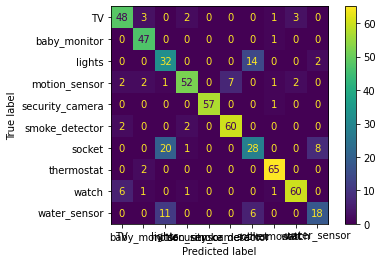

In [94]:
plot_confusion_matrix(DT,X_test,y_test)

In [95]:
def get_cv_score(DT, X, y, cv=5):
    
    np.random.seed(42)
    cv_accuracy = cross_val_score(DT,X,y,cv=5,
                         scoring='accuracy')
    print(f'Cross Validaion accuracy Scores: {cv_accuracy}')
    print(f'Cross Validation accuracy Mean Score: {cv_accuracy.mean()}')
      
    
    cv_merics = pd.DataFrame({'Accuracy': cv_accuracy.mean()}, index=[0])
    
    return cv_merics


In [96]:
cv_merics = get_cv_score(DT, X, y, cv=5)

Cross Validaion accuracy Scores: [0.73684211 0.81578947 0.86052632 0.84473684 0.84210526]
Cross Validation accuracy Mean Score: 0.82


In [97]:
cv_merics

,Accuracy
0,0.82
